***
Import the appropriate modules and use pandas to turn csv into data frame
***

In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import the csv as a dataframe
df = pd.read_csv('all_data.csv')

#make a smaller selection of data by country, as needed
notzimbabwe = df.loc[df["Country"] != "Zimbabwe"]

#set palette for colorblind inclusivity
sns.set_palette("colorblind")

***
Make a function to call lmplot and adjust title and save name
- cuts down a bit on coding later
- modularization
***

In [360]:
def makelmplot(xval, yval, dataframe, huetouse, fit_reg_yn, title, save_as, xticks, xticklabels, xlabel, ylabel):
    figure = sns.lmplot(x=xval, y=yval, data = dataframe, hue = huetouse, fit_reg = fit_reg_yn)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xticks == []:
        pass
    else:
        figure.ax.set_xticks(xticks)
    if xticklabels == []:
        pass
    else:
        figure.ax.set_xticklabels(xticklabels, rotation = 45)
    plt.savefig(save_as)

***
Call the function I just made for the full data set, as well as data set minus Zimbabwe
***

<Figure size 864x288 with 0 Axes>

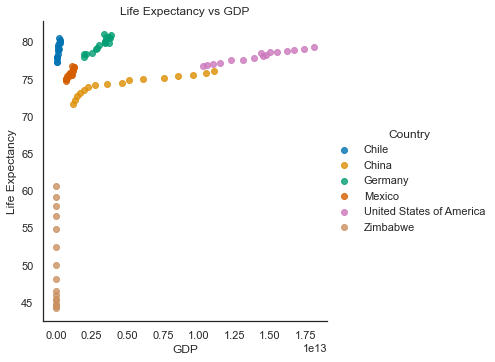

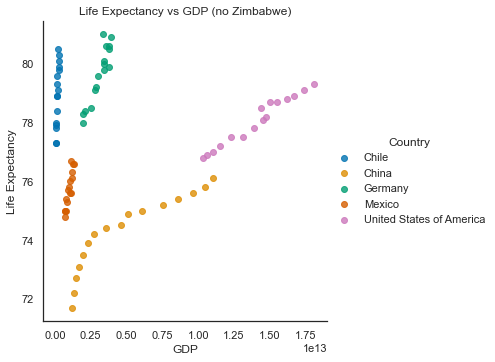

In [361]:
#Life expectancy vs GDP for full data set
xticks = [i*1e11 for i in range(0, 1900, 10)]

sns.set_style("white")
plt.figure(figsize=(12,4))
makelmplot("GDP", "Life expectancy at birth (years)", df, "Country", False, "Life Expectancy vs GDP", "full_lifevsGDP.svg",[], [], "GDP", "Life Expectancy")

#took zimbabwe out of the data set, b/c the GDP is so much lower.
makelmplot("GDP", "Life expectancy at birth (years)", notzimbabwe, "Country", False, "Life Expectancy vs GDP (no Zimbabwe)", "nozimb_lifevsGDP.svg", [], [], "GDP", "Life Expectancy")



***
Making a Facet Grid of each country's Life Expectancy vs GDP
- seeing each country individually allows us to see the trends side-by-side
***

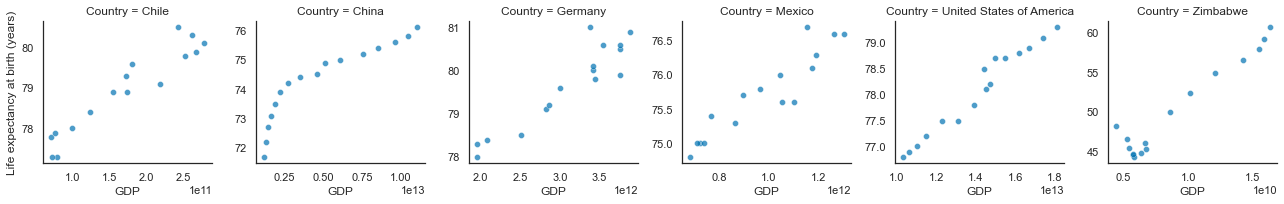

In [362]:
# graphing the countries next to each other, not sharing the same x or y axis
g = sns.FacetGrid(df, col="Country", sharex=False, sharey=False)
g.map(sns.scatterplot, "GDP", "Life expectancy at birth (years)", alpha=.7)
plt.savefig('individualcountries_lifevsGDP.svg')

***
Graphing the mins & maxes of life expectancy by country
- Which country had biggest change from min to max over time period?
- Which country had smallest change?
***

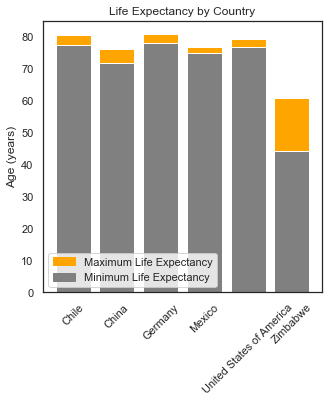

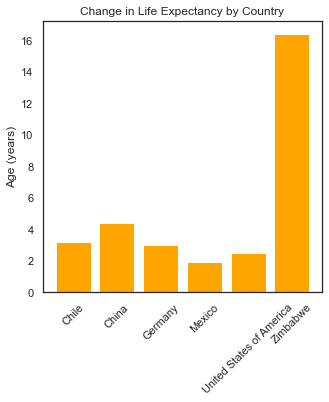

In [363]:
#graphing the mins & maxes of life expectancy
#first make a dictionary of max and mins and make sure they're in order
lifemins = {
    country: df.loc[df["Country"] == country]["Life expectancy at birth (years)"].min()
    for country in pd.unique(df["Country"])
              }
lifemaxes = {
    country: df.loc[df["Country"] == country]["Life expectancy at birth (years)"].max()
    for country in pd.unique(df["Country"])
              }
#maxes - mins of life expectancy  
diffs = {
    country: max - lifemins[country] for country, max in lifemaxes.items()
        }

countries = sorted(diffs.keys())
xvals = [c for c in countries]


#plotting the life expectancies by country as stacked bar graph, minimum and maximum (diff)
plt.figure(figsize = (5,5))
ax = plt.subplot()
plt.bar(xvals, list(lifemins.values()), color = 'gray')
plt.bar(xvals, list(diffs.values()), bottom = list(lifemins.values()), color = 'orange')
ax.set_xticks(xvals)
ax.set_xticklabels(countries, rotation = 45)
ages = {'Maximum Life Expectancy':'orange', 'Minimum Life Expectancy':'gray'}         
labels = list(ages.keys())
handles = [plt.Rectangle((0,0),1,1, color=ages[label]) for label in labels]
plt.legend(handles, labels)
plt.title("Life Expectancy by Country")
plt.ylabel("Age (years)")
plt.savefig('stackedbarlifeexpectancy.svg')
plt.show()

#plotting only the difference between max and min life expectancies (the change in expectancy)
plt.figure(figsize = (5,5))
ax = plt.subplot()
plt.bar(xvals, list(diffs.values()), color = 'orange')
ax.set_xticks(xvals)
ax.set_xticklabels(countries, rotation = 45)
plt.title("Change in Life Expectancy by Country")
plt.ylabel("Age (years)")
plt.savefig('lifeexpectancydiffs.svg')
plt.show()

***
Call the function from before and graph Life expectancy by year and GDP by year to see if there's any trends
***


/var/folders/dr/ssz70bd55wsgcyzt43b64c_m0000gn/T/ipykernel_82854/3350446352.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if xticks == []:
/var/folders/dr/ssz70bd55wsgcyzt43b64c_m0000gn/T/ipykernel_82854/3350446352.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if xticklabels == []:
/var/folders/dr/ssz70bd55wsgcyzt43b64c_m0000gn/T/ipykernel_82854/3350446352.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if xticks == []:
/var/folders/dr/ssz70bd55wsgcyzt43b64c_m0000gn/T/ipykernel_82854/3350446352.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if xticklabels == []:


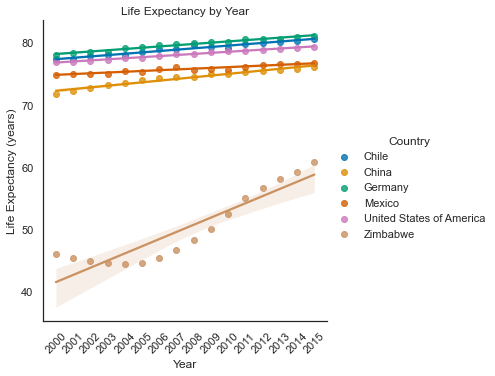

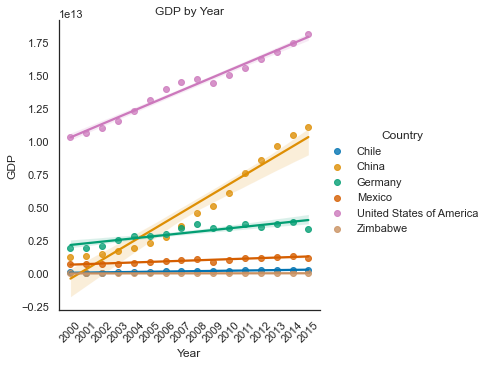

In [364]:
#Life expectancy by year for full data set
years = pd.unique(df["Year"])
graph1 = makelmplot("Year", "Life expectancy at birth (years)", df, "Country", True, "Life Expectancy by Year", 'lifeexpectancybyyear.svg', years, years, "Year", "Life Expectancy (years)")

#GDP by year for full data set
graph2 = makelmplot("Year", "GDP", df, "Country", True, "GDP by Year", 'gdpbyyear.svg', years, years, "Year", "GDP")



**Questions brought up by analyzing data:**

- Why do Chile and Zimbabwe have lower GDPs but largely dissimilar life expectancies?
- Why does Mexico have higher GDP than Chile but lower life expectancy?
- What happened in Zimbabwe in the early 2000s?
- Why is GDP in USA so high, but life expectancy is lower than Germany?
- Why is China's GDP rising at a much higher rate than the others?
- Why is Life Expectancy vs GDP linear in all countries except for China?
- What happened in China in early 2000s to affect GDP and life expectancy so strongly?